In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results =[]

for x in [1,2,3,4,5]:
    results.append(x**2)
    
print(results)

[1, 4, 9, 16, 25]


In [3]:
gdp_df=pd.read_csv('../data/gdp_per_capita.csv')

In [4]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [5]:
#5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df=gdp_df.drop("Value Footnotes",axis='columns')
gdp_df=gdp_df.rename(columns={"Country or Area":"Country","Year":'Year',"Value":"GDP_Per_Capita"})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


6. How many rows and columns does gdp_df have? What are the data types of its columns? 
If any of the columns are not the expected types, figure out why and fix it.
-7176 rows 3 columns
Country            object / Year                int64/ GDP_Per_Capita    float64

In [6]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

'1990-2020' ,  number of countries per year changes


In [7]:
gdp_df['Year'].value_counts(ascending=False).head()

2017    242
2016    242
2018    242
2014    242
2013    242
Name: Year, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? 

242 countries   

Somalia   

some coutries are new

In [8]:
gdp_df['Country'].value_counts()

Central Europe and the Baltics    31
El Salvador                       31
World                             31
Switzerland                       31
Upper middle income               31
                                  ..
Kosovo                            13
Sint Maarten (Dutch part)         10
Turks and Caicos Islands          10
Djibouti                           8
Somalia                            8
Name: Country, Length: 242, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [9]:
gdp_2014=gdp_df[(gdp_df["Year"]==2014)]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [10]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

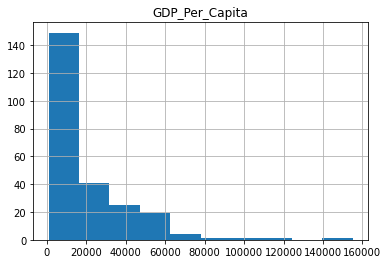

In [11]:
hist_2014=gdp_2014.hist(column="GDP_Per_Capita",bins=10)
hist_2014

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [12]:
gdp_2018=gdp_df[(gdp_df["Year"]==2018)].sort_values(by=["GDP_Per_Capita"])
gdp_2018.head(-5)

,Country,Year,GDP_Per_Capita
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348
...,...,...,...
4876,Norway,2018,64341.258681
6810,United Arab Emirates,2018,66968.221181
6315,Switzerland,2018,70597.292069
1123,Cayman Islands,2018,71834.288977


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.


In [13]:
gdp_pivoted=gdp_df.pivot_table(values="GDP_Per_Capita",index="Country",columns="Year")

In [14]:
gdp_pivoted =gdp_pivoted.drop(columns=[2019,2020],axis=0)

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [15]:
gdp_pivoted['Percent_Change']=(gdp_pivoted[2018]-gdp_pivoted[1990])*100/gdp_pivoted[1990]
type(gdp_pivoted)

pandas.core.frame.DataFrame

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

17 countries

In [38]:
negative_gdp=gdp_pivoted.loc[(gdp_pivoted['Percent_Change']<0)].sort_values(by='Percent_Change')
negative_gdp.sort_values(by='Percent_Change').head()
negative_gdp.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Dem. Rep. Congo,1819.723315,1606.326694,1382.761987,1150.836230,1066.468172,1039.752865,1000.689174,921.422433,885.785895,828.209256,...,865.684040,894.826545,926.787816,972.455934,1029.790813,1065.242371,1055.572915,1059.810762,1085.893688,-40.326440
United Arab Emirates,111454.055665,106103.552655,103470.924576,98978.474614,100213.156226,101570.992100,102211.638844,105108.996265,100100.435658,97698.537395,...,54921.797247,56122.576682,57389.318786,59920.152313,62452.184508,65267.415127,66510.893666,67183.605312,66968.221181,-39.914056
Burundi,1184.842032,1215.887215,1202.106321,1105.228711,1044.716092,947.822231,861.482899,839.196865,870.043821,850.046951,...,846.169112,852.502576,862.715651,877.272857,886.235296,825.205574,794.604340,773.572859,761.524143,-35.727791
Ukraine,16428.480469,14967.733398,13447.164062,11531.298828,8934.775391,7906.957031,7179.677734,7028.046387,6956.398926,7008.243652,...,12221.440430,12933.356445,12985.086914,13020.600586,12385.813477,11216.118164,11536.316406,11860.560547,12336.926758,-24.905247
Congo,5068.286948,5049.206077,5040.357668,4854.626404,4461.657639,4510.633104,4571.971362,4414.313537,4448.409191,4209.771602,...,5169.167421,5137.611683,5504.184956,5331.904082,5552.844606,5224.302467,4544.075841,4234.659883,3928.427999,-22.490024


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  

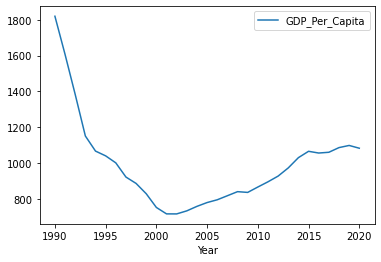

In [80]:
congo=gdp_df[(gdp_df['Country']=='Dem. Rep. Congo')].plot.line(x='Year',y='GDP_Per_Capita')

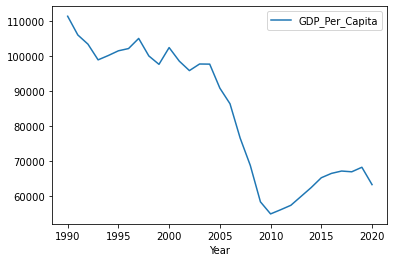

In [81]:
emi=gdp_df[(gdp_df['Country']=='United Arab Emirates')].plot.line(x='Year',y='GDP_Per_Capita')

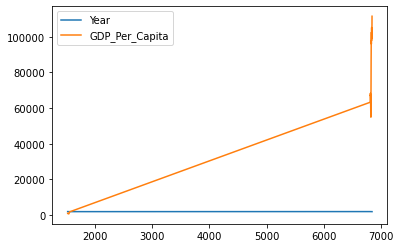

In [72]:
congo_emi=gdp_df[(gdp_df['Country']=='United Arab Emirates') | (gdp_df['Country']=='Dem. Rep. Congo')].plot.line()
congo_emi=congo_emi.plot.line(x='Year',y="GDP_Per_Capita",)

**Bonus:** Put both line charts on the same plot.

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [83]:
continents=pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [93]:
gdp_df=gdp_df.merge(continents,how='inner')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2020,1970.560169,Asia
1,Afghanistan,2019,2065.036235,Asia
2,Afghanistan,2018,2033.804389,Asia
3,Afghanistan,2017,2058.400221,Asia
4,Afghanistan,2016,2057.067978,Asia
...,...,...,...,...
5577,Zimbabwe,1994,2603.927369,Africa
5578,Zimbabwe,1993,2420.092791,Africa
5579,Zimbabwe,1992,2437.152908,Africa
5580,Zimbabwe,1991,2733.696626,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

In [100]:
gdp=gdp_df.groupby(['Continent'])['Continent'].count()
gdp.to_frame(name="count of countries")

,gdp
Continent,
Africa,1485
Asia,1247
Europe,1316
North America,783
Oceania,410
South America,341


20. Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correc this without modifying the original csv file.
 
22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Solo Exploration and Presentation:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).